# ML HW1 | Supervised Learning | SVM
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import time

## Set directory

In [16]:
directory = "/Users/michaelpecorino/Documents/GitLab/nba/"

## Load inputs

In [17]:
ncaa_all = pd.read_csv(directory + "nba_all.csv")
train = pd.read_csv(directory + "nba_train.csv")
valid = pd.read_csv(directory + "nba_valid.csv")
test = pd.read_csv(directory + "nba_test.csv")

## Define features and response variable

### Features

In [18]:
features = ["game_win_perc_prop", 
            "game_starters_total_minutes_prop", "game_starters_prop_minutes_prop", "game_player_pts_10plus_prop",
            "game_player_pts_15plus_prop", "game_player_pts_16plus_prop", "game_player_pts_17plus_prop",
            "game_player_pts_18plus_prop", "game_player_pts_19plus_prop", "game_player_pts_20plus_prop",
            "game_player_pts_21plus_prop", "game_player_pts_22plus_prop", "game_player_ast_3plus_prop",
            "game_player_ast_5plus_prop", "game_player_ast_7plus_prop",
            "game_player_orb_1plus_prop", "game_player_orb_2plus_prop", "game_player_orb_3plus_prop",
            "game_player_drb_5plus_prop", "game_player_drb_7plus_prop", "game_player_drb_10plus_prop",
            "game_gs_mean_prop", "game_gs_max_prop", "game_pos_prop", "game_pts_prop", "game_efficiency_prop",
            "game_fg_attempted_prop", "game_ft_attempted_prop", "game_ft_made_prop", "game_stl_prop",
            "game_tov_prop","game_stl_tov_ratio_diff", "game_stl_tov_ratio_prop", "game_blk_prop",
            "game_orb_prop", "game_drb_prop", "game_trb_prop", "game_ast_prop", "game_pf_diff", "game_pf_prop",
            "home_indicator", "game_age_mean_prop"]
ncaa_all_features = ncaa_all[features]
train_features = train[features]
valid_features = valid[features]
train_valid_features = train_features.append(valid_features)
test_features = test[features]

### Response variable

In [19]:
response_variable = "win_indicator"
ncaa_all_response = ncaa_all[response_variable]
train_response = train[response_variable]
valid_response = valid[response_variable]
train_valid_resposnse = train_response.append(valid_response)
test_response = test[response_variable]

## SVM

### Grid search

In [20]:
folds = set(train['fold'])
folds

{1, 2, 3, 4, 5}

In [27]:
svm_results = pd.DataFrame(columns = ['c', 'kernel',
                                      'fold', 'in_fold_accuracy', 'out_fold_accuracy'])

cs = [.01, .02, .05, .1, .15, .2, .25, .3]
kernels = ["rbf", "sigmoid"]
for C in cs:
    for kernel in kernels:
        for fold in folds:
            
            #Debugging
            #C = .01
            #kernel = "rbf"
            #fold = 1
        
            train_features_in_fold = train[train["fold"] != fold][features]
            train_response_in_fold = train[train["fold"] != fold][response_variable]
        
            test_features_out_fold = train[train["fold"] == fold][features]
            test_response_out_fold = train[train["fold"] == fold][response_variable]
            
            print("Modeling fold", fold, "with complexity:", C, "and kernel:", kernel)

            svm_model = SVC(C = C,
                            kernel = kernel,
                            degree = 3,
                            gamma = 'auto',
                            coef0 = 0.0,
                            shrinking = True,
                            probability = False,
                            tol = 0.001,
                            cache_size = 200,
                            class_weight = None,
                            verbose = False,
                            max_iter = -1,
                            decision_function_shape = 'ovr',
                            random_state = 28
                            )

            svm_model.fit(train_features_in_fold, train_response_in_fold) 

            in_fold_accuracy = svm_model.score(train_features_in_fold, train_response_in_fold)
            out_fold_accuracy = svm_model.score(test_features_out_fold, test_response_out_fold)

            svm_results = svm_results.append({'c': C,
                                              'kernel': kernel,
                                              'fold': fold,
                                              'in_fold_accuracy': in_fold_accuracy,
                                              'out_fold_accuracy': out_fold_accuracy},
                                            ignore_index = True)
            print(svm_results, "\n")

Modeling fold 1 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.585062           0.604972 

Modeling fold 2 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.585062           0.604972
1  0.01    rbf    2          0.569997           0.562932 

Modeling fold 3 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.585062           0.604972
1  0.01    rbf    2          0.569997           0.562932
2  0.01    rbf    3          0.604908           0.575380 

Modeling fold 4 with complexity: 0.01 and kernel: rbf
      c kernel fold  in_fold_accuracy  out_fold_accuracy
0  0.01    rbf    1          0.585062           0.604972
1  0.01    rbf    2          0.569997           0.562932
2  0.01    rbf    3          0.604908           0.575380
3  0.01    rbf    4          0.568960

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
5   0.01  sigmoid    1          0.504149           0.504144
6   0.01  sigmoid    2          0.500864           0.475795
7   0.01  sigmoid    3          0.506740           0.493776
8   0.01  sigmoid    4          0.506395           0.495159
9   0.01  sigmoid    5          0.504321           0.503458
10  0.02      rbf    1          0.624136           0.651934
11  0.02      rbf    2          0.628759           0.608575
12  0.02      rbf    3          0.646733           0.614108
13  0.02      rbf    4          0.635327           0.650069
14  0.02      rbf    5          0.642240           0.634855
15  0.02  sigmoid    1          0.504149

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
..   ...      ...  ...               ...                ...
56  0.20  sigmoid    2          0.604908           0.612725
57  0.20  sigmoid    3          0.593156           0.594744
58  0.20  sigmoid    4          0.597995           0.589212
59  0.20  sigmoid    5          0.616315           0.600277
60  0.25      rbf    1          0.671508           0.712707

[61 rows x 5 columns] 

Modeling fold 2 with complexity: 0.25 and kernel: rbf
       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    

       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3          0.604908           0.575380
3   0.01      rbf    4          0.568960           0.560166
4   0.01      rbf    5          0.596267           0.578147
..   ...      ...  ...               ...                ...
67  0.25  sigmoid    3          0.588317           0.590595
68  0.25  sigmoid    4          0.580712           0.578147
69  0.25  sigmoid    5          0.601452           0.587828
70  0.30      rbf    1          0.676349           0.705801
71  0.30      rbf    2          0.683028           0.656985

[72 rows x 5 columns] 

Modeling fold 3 with complexity: 0.3 and kernel: rbf
       c   kernel fold  in_fold_accuracy  out_fold_accuracy
0   0.01      rbf    1          0.585062           0.604972
1   0.01      rbf    2          0.569997           0.562932
2   0.01      rbf    3

### Output

In [39]:
svm_results = svm_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
svm_results.to_csv(directory + "svm_grid_search.csv")
svm_results

,c,kernel,fold,in_fold_accuracy,out_fold_accuracy
40,0.15,rbf,1,0.669779,0.718232
50,0.20,rbf,1,0.672545,0.715470
60,0.25,rbf,1,0.671508,0.712707
30,0.10,rbf,1,0.662863,0.708564
70,0.30,rbf,1,0.676349,0.705801
...,...,...,...,...,...
8,0.01,sigmoid,4,0.506395,0.495159
17,0.02,sigmoid,3,0.507086,0.493776
7,0.01,sigmoid,3,0.506740,0.493776
6,0.01,sigmoid,2,0.500864,0.475795


### Get mean accuracy across the folds

In [40]:
in_fold_cv_summary = svm_results.groupby(['c', 'kernel'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = svm_results.groupby(['c', 'kernel'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                  mean
c    kernel           
0.25 rbf      0.674768
0.20 rbf      0.674491
0.30 rbf      0.673110
0.15 rbf      0.670064
0.10 rbf      0.666471
0.05 rbf      0.654584
0.02 rbf      0.631908
0.15 sigmoid  0.608124
0.20 sigmoid  0.602320
0.25 sigmoid  0.590153
0.30 sigmoid  0.584621
0.01 rbf      0.576320
0.10 sigmoid  0.568304
0.05 sigmoid  0.509955
0.02 sigmoid  0.494743
0.01 sigmoid  0.494466


### Get the optimal hyperparameters

In [31]:
c_opt = 0.25
kernel_opt = "rbf"

### Train a final model with the optimal hyperparameters

In [32]:
svm_model = SVC(C = c_opt,
                kernel = kernel_opt,
                degree = 3,
                gamma = 'auto',
                coef0 = 0.0,
                shrinking = True,
                probability = False,
                tol = 0.001,
                cache_size = 200,
                class_weight = None,
                verbose = False,
                max_iter = -1,
                decision_function_shape = 'ovr',
                random_state = 28)

svm_model.fit(train_features, train_response) 

print("SVM accuracy on training data: ",
      svm_model.score(train_features, train_response))
print("SVM accuracy on validation data: ",
      svm_model.score(valid_features, valid_response))
print("SVM accuracy on test data: ",
      svm_model.score(test_features, test_response))

SVM accuracy on training data:  0.6847345132743363
SVM accuracy on validation data:  0.6797934151065204
SVM accuracy on test data:  0.6657633242999097


### Learning curve

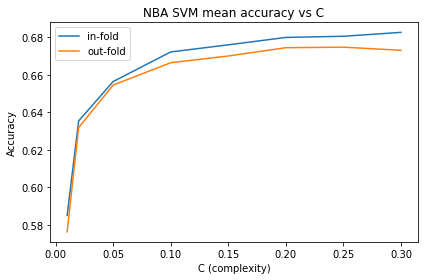

In [43]:
in_fold_c_summary = svm_results[(svm_results['kernel'] == kernel_opt)].groupby(['c'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['c'], ascending = True)
out_fold_c_summary = svm_results[(svm_results['kernel'] == kernel_opt)].groupby(['c'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['c'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("C (complexity)")
ax.set_ylabel("Accuracy")
ax.set_title("NBA SVM mean accuracy vs C")
ax.plot(cs,
        in_fold_c_summary['mean'],
        label = "in-fold")
ax.plot(cs,
        out_fold_c_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

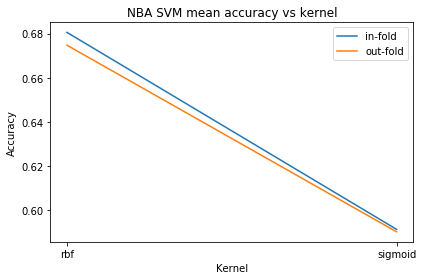

In [42]:
in_fold_k_summary = svm_results[(svm_results['c'] == c_opt)].groupby(['kernel'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['kernel'], ascending = True)
out_fold_k_summary = svm_results[(svm_results['c'] == c_opt)].groupby(['kernel'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['kernel'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Kernel")
ax.set_ylabel("Accuracy")
ax.set_title("NBA SVM mean accuracy vs kernel")
ax.plot(kernels,
        in_fold_k_summary['mean'],
        label = "in-fold")
ax.plot(kernels,
        out_fold_k_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

In [35]:
svm_train_sizes = []
svm_train_size_train_scores = []
svm_train_size_test_scores = []
svm_train_size_train_time = []
svm_train_size_score_time = []

iter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter = iter + 1
    print("iter:", iter,
          " | train size:", train_size)
    svm_train_size = SVC(C = c_opt,
                         kernel = kernel_opt,
                         degree = 3,
                         gamma = 'auto',
                         coef0 = 0.0,
                         shrinking = True,
                         probability = False,
                         tol = 0.001,
                         cache_size = 200,
                         class_weight = None,
                         verbose = False,
                         max_iter = -1,
                         decision_function_shape = 'ovr',
                         random_state = 28
                         )
    start = time.time()
    svm_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    svm_train_size_train_time.append(end - start)

    svm_train_sizes.append(svm_train_size)
    
    start = time.time()
    svm_train_size_train_scores.append(svm_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    svm_train_size_score_time.append(end - start)

    svm_train_size_test_scores.append(svm_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

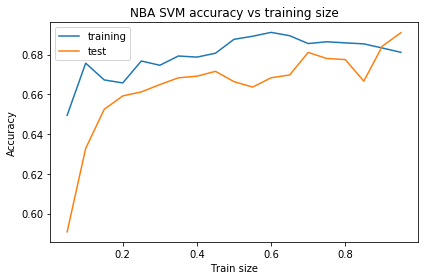

In [44]:
fig, ax = plt.subplots()

ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("NBA SVM accuracy vs training size")
ax.plot(train_sizes, svm_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, svm_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

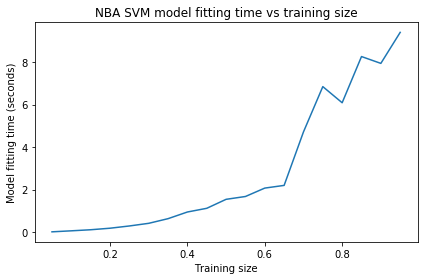

In [45]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("NBA SVM model fitting time vs training size")
ax.plot(train_sizes, svm_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

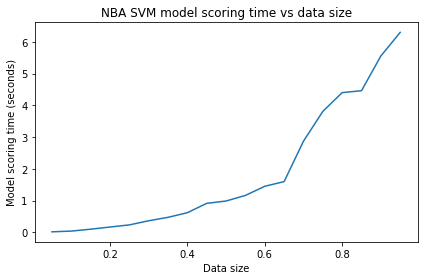

In [46]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("NBA SVM model scoring time vs data size")
ax.plot(train_sizes, svm_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()